### Data import

In [4]:
import numpy as np
import matplotlib.pyplot as plt

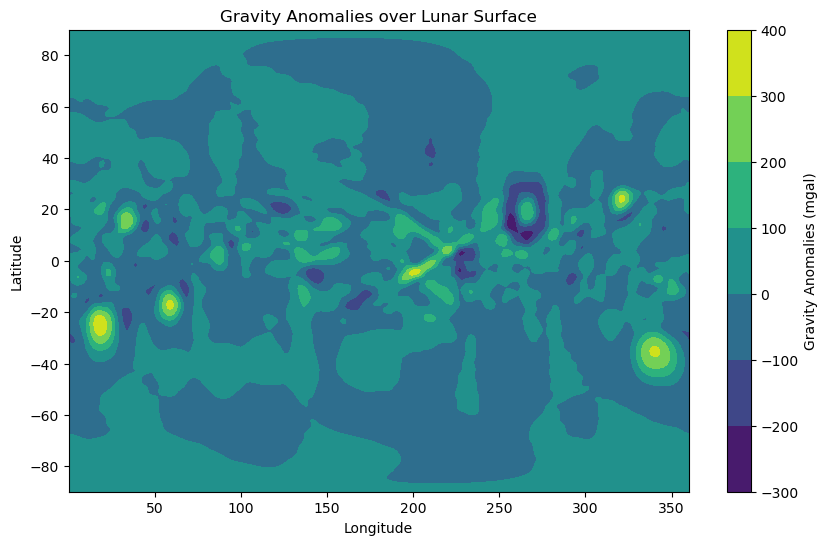

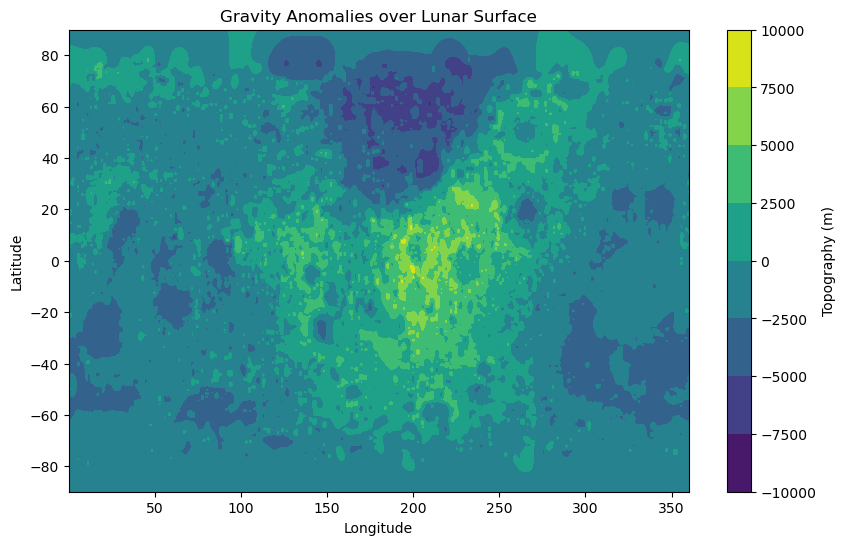

In [8]:
data1 = np.loadtxt('../Space_Files/fairgrd2.dat')
data2 = np.loadtxt('../Space_Files/topogrd2.dat')

# Step 2: Reshape it to a 1440 x 720 grid
grav_grid = np.reshape(data1, (720, 1440))
topo_grid = np.reshape(data2, (720, 1440))

# Step 3: Create latitude and longitude arrays
lon = np.linspace(0.125, 359.875, 1440)
lat = np.linspace(89.875, -89.875, 720)

# Create a meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Plot the gravity anomalies as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, grav_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Gravity Anomalies (mgal)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gravity Anomalies over Lunar Surface')
plt.show()

# Plot the topography as a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, topo_grid, cmap='viridis')  # You can choose any colormap you like
plt.colorbar(label='Topography (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gravity Anomalies over Lunar Surface')
plt.show()